<center><img src="img/pymor_logo.png" width="70%"></center>

# Model Order Reduction with pyMOR -- an Interactive Crash Course

## pyMOR School 2021
## Stephan Rave, Petar Mlinarić

# Outline

## What is pyMOR?

## Reduced Basis Methods with pyMOR

## System-Theoretic Methods with pyMOR

# What is pyMOR?

pyMOR is ...

- a software library for writing **M**odel **O**rder **R**eduction applications

- in the **py**thon programming language.

- BSD-licensed, fork us on [Github](https://github.com/pymor/pymor).

- Started 2012, 22k lines of code, 7k commits.

## Design Goals

> **Goal 1:** One library for algorithm development *and* large-scale applications.

- Small NumPy/SciPy-based discretization toolkit for easy prototyping.
- `VectorArray`, `Operator`, `Model` interfaces for seamless integration with high-performance PDE solvers.

> **Goal 2:** Unified view on MOR.

- Implement RB and system-theoretic methods in one common language.

## Implemented Algorithms

- Gram-Schmidt, POD, HAPOD.
- Greedy basis generation with different extension algorithms.
- Automatic (Petrov-)Galerkin projection of arbitrarily nested affine combinations of operators.
- Interpolation of arbitrary (nonlinear) operators, EI-Greedy, DEIM.
- A posteriori error estimation.
- System theory methods: balanced truncation, IRKA, ...
- Iterative linear solvers, eigenvalue computation, Newton algorithm, time-stepping algorithms.
- **New!** Non-intrusive MOR using artificial neural networks.

## PDE Solvers

### Official Support:

- [deal.II](https://dealii.org)
- [FEniCS](https://fenicsproject.org)
- [NGSolve](https://ngsolve.org)

### Used with:

- [DUNE](https://dune-project.org)
- [BEST](https://www.itwm.fraunhofer.de/en/departments/sms/products-services/best-battery-electrochemistry-simulation-tool.html)
- [GridLOD](https://github.com/fredrikhellman/gridlod)
- file I/O, e.g. [COMSOL](https://comsol.com)
- ...

## pyMOR Development

### Main Developers
<table><tr>
<td><img src="img/balicki.png"></td>
<td><img src="img/fritze.jpg"></td>
<td><img src="img/mlinaric.jpeg"></td>
<td><img src="img/rave.jpg"></td>
<td><img src="img/schindler.png"></td>
</tr></table>

### Contributions
- everyone can/should(!) contribute (see talk on Friday)
- everyone can become main developer

## Installing pyMOR

### Installing pyMOR using pip
 
- minimal installation:
  
  ```
  pip3 install pymor
  ```

- all bells and whistles
  
  ```
  pip3 install pymor[full]  # needed for GUI
  pip3 install mpi4py  # requires C compiler / MPI headers
  pip3 install slycot  # requires Fortran / OpenBLAS headers
  ```
  
  [M.E.S.S.](https://www.mpi-magdeburg.mpg.de/projects/mess) (Matrix Equation Sparse Solver), `pip install pymess`

Using a [virtual environment](https://docs.python.org/3/tutorial/venv.html) is highly recommended.

### Installing pyMOR using conda


- all bells and whistles (windows)

  ```
  conda install -c conda-forge python=3.8 pymor  # 3.8 if you need pytorch
  conda install -c conda-forge slycot
  conda install -c pytorch pytorch
  ```
  
- all bells and whistles (linux)
  ```
  conda install -c conda-forge pymor
  conda install -c conda-forge slycot
  conda install -c conda-forge pytorch
  conda install -c conda-forge fenics # not on windows
  ```
  
Avoid mixing [conda-forge](https://conda-forge.org) with other channels,
  
  ```
  conda config --set channel_priority strict 
  ```
  
and use a separate environment. (NGSolve is incompatible.)

### Using the docker container

```
docker pull pymor/demo:main
```

Comes with everything pre-installed, including FEniCS and NGSolve.

### Using our Binderhub
Go to

>  https://binderhub.uni-muenster.de/v2/gh/pymor/pymor/2021.1.0?token=ko5zhb3pn5ue4tbl

- Runs our docker image.
- Persistent storage during pyMOR School.
- Create your own directory and don't open other people's stuff!

## Hello pyMOR!

In [1]:
import pymor
pymor.config

pyMOR Version 2021.1.0

Python: 3.7.11

External Packages
--------------------------------
DEALII:      missing
FENICS:      missing
GL:          3.1.5
IPYTHON:     7.1.0
IPYWIDGETS:  7.6.5
MATPLOTLIB:  3.4.3
MESHIO:      present
MPI:         missing
NGSOLVE:     missing
NUMPY:       1.21.2
PYAMG:       missing
PYMESS:      missing
PYTEST:      6.2.5
PYTHREEJS:   missing
QT:          PySide2 (Qt 5.15.1)
QTOPENGL:    present
SCIPY:       1.7.1
SCIPY_LSMR:  present
SLYCOT:      0.4.0
SPHINX:      4.2.0
TORCH:       1.9.1+cu102
TYPER:       0.4.0
VTKIO:       present

Defaults
--------
See pymor.core.defaults.print_defaults.

In [2]:
from pymor.basic import *
print_defaults()

00:08 |WARNING|_import_all: Failed to import pymor.discretizers.builtin.gui.jupyter.threejs


                                pyMOR defaults                                 

path (shortened)                       value                             source
-------------------------------------  --------------------------------  ------
basic.almost_equal.atol                1e-14                             code  
basic.almost_equal.rtol                1e-14                             code  
genericsolvers.apply_inverse.check_fi  True                              code  
nite                                                                           
genericsolvers.apply_inverse.default_  'generic_least_squares_lsmr'      code  
least_squares_solver                                                           
genericsolvers.apply_inverse.default_  'generic_lgmres'                  code  
solver                                                                         
genericsolvers.solver_options.least_s  1e-06                             code  
quares_lsmr_atol                       

## Subpackages of the pymor Package

|                                |                                                      |
| :-                             | :-                                                   |
| **`pymor.algorithms`**         | generic algorithms                                   |
| **`pymor.analyticalproblems`** | problem descriptions for use with discretizers       |
| `pymor.bindings`               | bindings to external solvers                         |
| `pymor.core`                   | base classes/caching/defaults/logging                |
| **`pymor.discretizers`**       | create `Models` from `analyticalproblems`            |
| **`pymor.models`**             | `Model` interface/implementations                    |
| **`pymor.operators`**          | `Operator` interface/constructions                   |
| `pymor.parallel`               | `WorkerPools` for parallelization                    |
| **`pymor.parameters`**         | parameter support/`ParameterFunctionals`             |
| **`pymor.reductors`**          | most MOR algorithms (rest in `pymor.algorithms`)     |
| `pymor.tools`                  | non MOR-specific support code (pprint/floatcmp, ...) |
| **`pymor.vectorarrays`**       | `VectorArray` interface/implementations              |

## Getting help

- pyMOR's documentation can be found at

  > https://docs.pymor.org

- Be sure to read the [introduction](https://docs.pymor.org/2021-1-0/getting_started.html),
  the [technical overview](https://docs.pymor.org/2021-1-0/technical_overview.html) and
  the [tutorials](https://docs.pymor.org/2021-1-0/tutorials.html).

- Ask questions on

  > https://github.com/pymor/pymor/discussions

# Reduced Basis Methods with pyMOR

## Building the FOM

### The Thermal Block Problem

Solve:

\begin{align}
- \nabla \cdot [d(x, \mu) \nabla u(x, \mu)] &= f(x),  & x &\in \Omega,\\
                                  u(x, \mu) &= 0,     & x &\in \partial\Omega,
\end{align}

where

\begin{align}
d(x, \mu) &= \sum_{q=1}^Q \mathbb{1}_{\Omega_q}, \\
f(x)      &= 1.
\end{align}

satisfying $\overline{\Omega} = \overline{\dot{\bigcup}_{i=1}^{Q} \Omega_q}$.

### Setting up an analytical description of the thermal block problem

The thermal block problem already comes with pyMOR:

In [3]:
from pymor.basic import *
p = thermal_block_problem([2,2])

Our problem is parameterized:

In [4]:
p.parameters

Parameters({diffusion: 4})

### Looking at the definition

We can easily look at the definition of `p` by printing its `repr`:

In [5]:
p

StationaryProblem(
    RectDomain(domain=array([[0, 0], [1, 1]])),
    rhs=ConstantFunction(dim_domain=2),
    diffusion=LincombFunction(
                  (ExpressionFunction(
                       '(x[0] >= ix * dx) * (x[0] < (ix + 1) * dx) * (x[1] >= iy * dy) * (x[1] < (iy + 1) * dy) * 1.',
                       dim_domain=2,
                       values={ix: 0, iy: 0, dx: 0.5, dy: 0.5},
                       name='diffusion_0_0'),
                   ExpressionFunction(
                       '(x[0] >= ix * dx) * (x[1] >= iy * dy) * (x[1] < (iy + 1) * dy) * 1.',
                       dim_domain=2,
                       values={ix: 1, iy: 0, dx: 0.5, dy: 0.5},
                       name='diffusion_1_0'),
                   ExpressionFunction(
                       '(x[0] >= ix * dx) * (x[0] < (ix + 1) * dx) * (x[1] >= iy * dy) * 1.',
                       dim_domain=2,
                       values={ix: 0, iy: 1, dx: 0.5, dy: 0.5},
                       name='diffusion_0_1'

### Building a discrete model

We use the builtin discretizer `discretize_stationary_cg` to compute a finite-element discretization of the problem:

In [6]:
from pymor.basic import *
fom, data = discretize_stationary_cg(p, diameter=1/100)

00:38 L2ProductP1: Integrate the products of the shape functions on each element
00:38 L2ProductP1: Determine global dofs ...
00:38 L2ProductP1: Boundary treatment ...
00:38 L2ProductP1: Assemble system matrix ...
00:38 DiffusionOperatorP1: Calculate gradients of shape functions transformed by reference map ...
00:38 DiffusionOperatorP1: Calculate all local scalar products between gradients ...
00:38 DiffusionOperatorP1: Determine global dofs ...
00:38 DiffusionOperatorP1: Boundary treatment ...
00:38 DiffusionOperatorP1: Assemble system matrix ...
00:38 L2ProductP1: Integrate the products of the shape functions on each element
00:38 L2ProductP1: Determine global dofs ...
00:38 L2ProductP1: Boundary treatment ...
00:38 L2ProductP1: Assemble system matrix ...
00:38 DiffusionOperatorP1: Calculate gradients of shape functions transformed by reference map ...
00:38 DiffusionOperatorP1: Calculate all local scalar products between gradients ...
00:38 DiffusionOperatorP1: Determine global dof

`fom` is a `Model`. It has the same `Parameters` as `p`:

In [7]:
fom.parameters

Parameters({diffusion: 4})

### Looking at the model

`fom` inherits its structure from `p`:

In [8]:
fom

StationaryModel(
    LincombOperator(
        (NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='boundary_part'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_0'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_1'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_2'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_3')),
        (1.0,
         ProjectionParameterFunctional('diffusion', size=4, index=0, name='diffusion_0_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=1, name='diffusion_1_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=2, name='diffusion_0_1'),
         ProjectionParameterFunctional('diffusion', size=4, inde

### Note

> Using an `analyticalproblem` and a `discretizer` is just one way
  to build the FOM.
  
> Everything that follows works the same for a FOM built using an external PDE solver.

### Solving the FOM

Remember the FOM's parameters:

In [9]:
fom.parameters

Parameters({diffusion: 4})

To `solve` the FOM, we need to specify values for those parameters:

In [10]:
U = fom.solve({'diffusion': [1., 0.01, 0.1, 1]})

01:02 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [1.0, 0.01, 0.1, 1.0]} ...


`U` is a `VectorArray`, an ordered collection of vectors of the same dimension:

In [11]:
U

NumpyVectorArray(
    [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.57846167e-04
      2.33508510e-04 8.79461711e-05]],
    NumpyVectorSpace(20201, id='STATE'))

> There is not the notion of a single vector in pyMOR! Don't try to get hold of one!

### Some words about VectorArrays

Each `VectorArray` has a length, giving you the number of vectors:

In [12]:
len(U)

1

Its dimension gives you the *uniform* size of each vector in the array:

In [13]:
U.dim

20201

### Supported Operations:

|                  |                                                        |
| :-               | :-                                                     |
| `+`/`-`/`*`      | elementwise addition/subtraction/scalar multiplication |
| `inner`          | matrix of inner products between all vectors           |
| `pairwise_inner` | list of pairwise inner products                        |
| `lincomb`        | linear combination of the vectors in the array         |
| `scal`           | in-place scalar multiplication                         |
| `axpy`           | in-place BLAS axpy operation                           |
| `dofs`           | return some degrees of freedom as NumPy array          |
| `norm`           | list of norms                                          |
| `append`         | append vectors from another array                      |

### Playing a bit with VectorArrays

> All `VectorArrays` are created by their `VectorSpace`

In [14]:
V = fom.solution_space.empty()

Let's accumulate some solutions:

In [15]:
for mu in p.parameter_space.sample_randomly(10):
    V.append(fom.solve(mu))

01:24 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.4370861069626263, 0.9556428757689246, 0.7587945476302645, 0.6387926357773329]} ...
01:24 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.24041677639819287, 0.2403950683025824, 0.15227525095137953, 0.8795585311974417]} ...
01:24 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.6410035105688879, 0.737265320016441, 0.1185260448662222, 0.9729188669457949]} ...
01:24 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.8491983767203796, 0.29110519961044856, 0.26364247048639056, 0.2650640588680905]} ...
01:25 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.373818018663584, 0.5722807884690141, 0.48875051677790415, 0.36210622617823773]} ...
01:25 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.6506676052501416, 0.22554447458683766, 0.3629301836816964, 0.4297256589643226]} ...
01:25 StationaryModel: Solving ThermalBlock([2, 2])_C

In [ ]:
# your code here ...

### Indexing
We can index a `VectorArray` using numbers, sequences of numbers, or slices, e.g.:

In [16]:
V_indexed = V[3:6]

Indexing **always** create a view on the original array:

In [17]:
print(V_indexed.is_view)
V_indexed *= 0
V.norm()

True


array([ 8.57053135, 18.88258356, 12.51902931,  0.        ,  0.        ,
        0.        , 11.50405509, 16.82955504, 10.03586733, 14.61341973])

### Looking at the solution

We can use the `visualize` method to plot the solution:

In [18]:
fom.visualize(U)

Output()

### Looking at the solution

An array with multiple elements is visualized as a time-series:

In [19]:
fom.visualize(V)

<pymor.discretizers.builtin.gui.jupyter.matplotlib.visualize_patch.<locals>.Plot at 0x7f5b153d9810>

### Is the solution really a solution?

We compute the residual:

In [20]:
mu = fom.parameters.parse([1., 0.01, 0.1, 1])
U = fom.solve(mu)
(fom.operator.apply(U, mu=mu) - fom.rhs.as_vector(mu)).norm()

01:58 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [1.0, 0.01, 0.1, 1.0]} ...


array([4.93853524e-15])

> If you implement a `Model`, make sure that `solve` really returns solutions with zero residual!

### So how is `fom.rhs` defined?

Let's look at it:

In [21]:
fom.rhs

NumpyMatrixOperator(<20201x1 dense>, range_id='STATE')

What does `as_vector` do?

In [22]:
from pymor.tools.formatsrc import print_source
print_source(fom.rhs.as_vector)

def as_vector(self, mu=None):
        """Return a vector representation of a linear functional or vector operator.

        Depending on the operator's :attr:`~Operator.source` and
        :attr:`~Operator.range`, this method is equivalent to calling
        :meth:`~Operator.as_range_array` or :meth:`~Operator.as_source_array`
        respectively. The resulting |VectorArray| is required to have length 1.

        Parameters
        ----------
        mu
            The |parameter values| for which to return the vector representation.

        Returns
        -------
        V
            |VectorArray| of length 1 containing the vector representation.
        """
        if not self.linear:
            raise TypeError('This nonlinear operator does not represent a vector or linear functional.')
        if self.source.is_scalar:
            return self.as_range_array(mu)
        elif self.range.is_scalar:
            return self.as_source_array(mu)
        else:
            raise TypeError('This operator does not represent a vector or linear functional.')

## Reducing the FOM

### Building an approximation space

As before, we compute some random solution **snapshots** of the FOM, which will
span our **reduced** approximation space:

In [23]:
snapshots = fom.solution_space.empty()
for mu in p.parameter_space.sample_randomly(10):
    snapshots.append(fom.solve(mu))

02:28 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.20983441136030095, 0.5456592191001431, 0.13094966900369656, 0.9183883618709039]} ...
02:29 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.3329019834400152, 0.6962700559185838, 0.3805399684804699, 0.5680612190600297]} ...
02:29 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.5920392514089517, 0.26636900997297436, 0.9726261649881027, 0.7976195410250031]} ...
02:29 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.9455490474077702, 0.905344615384884, 0.6381099809299766, 0.9296868115208051]} ...
02:29 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.17964325184672755, 0.27638457617723067, 0.14070456001948428, 0.39279729768693794]} ...
02:29 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.4498095607205338, 0.34421412859650635, 0.8458637582367364, 0.4210779940242304]} ...
02:29 StationaryModel: Solving ThermalBlock([2, 2])

It's a good idea, to orthonormalize the basis:

In [24]:
basis = gram_schmidt(snapshots)

02:32 gram_schmidt: Orthonormalizing vector 1 again
02:32 gram_schmidt: Orthonormalizing vector 2 again
02:32 gram_schmidt: Orthonormalizing vector 3 again
02:32 gram_schmidt: Orthonormalizing vector 4 again
02:32 gram_schmidt: Orthonormalizing vector 5 again
02:32 gram_schmidt: Orthonormalizing vector 6 again
02:32 gram_schmidt: Orthonormalizing vector 7 again
02:32 gram_schmidt: Orthonormalizing vector 8 again
02:32 gram_schmidt: Orthonormalizing vector 9 again


### Projecting the Model

In pyMOR, ROMs are built using a `Reductor`. Let's pick the most basic `Reductor`
available for a `StationaryModel`:

In [25]:
reductor = StationaryRBReductor(fom, basis)

Every reductor has a `reduce` method, which builds the ROM:

In [26]:
rom = reductor.reduce()

02:39 StationaryRBReductor: Operator projection ...
02:39 StationaryRBReductor: Building ROM ...


### Comparing ROM and FOM

In [27]:
fom

StationaryModel(
    LincombOperator(
        (NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='boundary_part'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_0'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_1'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_2'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_3')),
        (1.0,
         ProjectionParameterFunctional('diffusion', size=4, index=0, name='diffusion_0_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=1, name='diffusion_1_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=2, name='diffusion_0_1'),
         ProjectionParameterFunctional('diffusion', size=4, inde

In [28]:
rom

StationaryModel(
    LincombOperator(
        (NumpyMatrixOperator(<10x10 dense>, name='boundary_part'),
         NumpyMatrixOperator(<10x10 dense>, name='diffusion_0'),
         NumpyMatrixOperator(<10x10 dense>, name='diffusion_1'),
         NumpyMatrixOperator(<10x10 dense>, name='diffusion_2'),
         NumpyMatrixOperator(<10x10 dense>, name='diffusion_3')),
        (1.0,
         ProjectionParameterFunctional('diffusion', size=4, index=0, name='diffusion_0_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=1, name='diffusion_1_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=2, name='diffusion_0_1'),
         ProjectionParameterFunctional('diffusion', size=4, index=3, name='diffusion_1_1')),
        name='ellipticOperator'),
    NumpyMatrixOperator(<10x1 dense>),
    products={h1: NumpyMatrixOperator(<10x10 dense>),
              h1_semi: NumpyMatrixOperator(<10x10 dense>, name='h1_semi'),
              l2: NumpyMatrixOperator(<10x10 dens

### Solving the ROM

To solve the ROM, we just use `solve` again,

In [29]:
mu = fom.parameters.parse([1., 0.01, 0.1, 1])
u_rom = rom.solve(mu)

to get the reduced coefficients:

In [30]:
u_rom

NumpyVectorArray(
    [[ 30.93256301  16.91363455  53.98890614   9.97899673  -9.27251948
      -16.50718606  -1.05610988   1.01033878   0.76104581   3.78690146]],
    NumpyVectorSpace(10))

A high-dimensional representation is obtained from the `reductor`:

In [31]:
U_rom = reductor.reconstruct(u_rom)

### Computing the MOR error

Let's compute the error:

In [32]:
U = fom.solve(mu)
ERR = U - U_rom
ERR.norm() / U.norm()

02:57 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [1.0, 0.01, 0.1, 1.0]} ...


array([0.1227483])

and look at it:

In [33]:
fom.visualize(ERR)

Output()

### Certified Reduced Basis Method

Let's use use a more sophisticated `reductor` which assembles an efficient
upper bound for the MOR error:

In [34]:
reductor = CoerciveRBReductor(
   fom,
   product=fom.h1_0_semi_product,
   coercivity_estimator=ExpressionParameterFunctional('min(diffusion)', fom.parameters)
)

and build a basis using a greedy search over the parameter space:

In [35]:
training_set = p.parameter_space.sample_uniformly(4)
print(training_set[0])

{diffusion: [0.1, 0.1, 0.1, 0.1]}


In [36]:
greedy_data = rb_greedy(fom, reductor, training_set, max_extensions=20)
print(greedy_data.keys())
rom = greedy_data['rom']

03:11 weak_greedy: Started greedy search on training set of size 256.
03:11 weak_greedy: Estimating errors ...
03:11 |   RBSurrogate: Reducing ...
03:11 |   |   CoerciveRBReductor: Operator projection ...
03:11 |   |   CoerciveRBReductor: Assembling error estimator ...
03:11 |   |   |   ResidualReductor: Estimating residual range ...
03:11 |   |   |   |   estimate_image_hierarchical: Estimating image for basis vector -1 ...
03:12 |   |   |   |   estimate_image_hierarchical: Orthonormalizing ...
03:12 |   |   |   ResidualReductor: Projecting residual operator ...
03:12 |   |   CoerciveRBReductor: Building ROM ...
03:12 weak_greedy: Maximum error after 0 extensions: 1.8745731821515565 (mu = {diffusion: [0.1, 0.1, 0.1, 0.1]})
03:12 weak_greedy: Extending surrogate for mu = {diffusion: [0.1, 0.1, 0.1, 0.1]} ...
03:12 |   RBSurrogate: Computing solution snapshot for mu = {diffusion: [0.1, 0.1, 0.1, 0.1]} ...
03:12 |   |   StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.1

03:14 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 17 again
03:14 |   |   |   |   |   gram_schmidt: Removing linearly dependent vector 18
03:14 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 19 again
03:14 |   |   |   |   |   gram_schmidt: Removing linearly dependent vector 20
03:14 |   |   |   ResidualReductor: Projecting residual operator ...
03:14 |   |   CoerciveRBReductor: Building ROM ...
      
03:14 weak_greedy: Estimating errors ...
03:15 weak_greedy: Maximum error after 5 extensions: 0.9452361443614147 (mu = {diffusion: [0.1, 0.1, 1.0, 1.0]})
03:15 weak_greedy: Extending surrogate for mu = {diffusion: [0.1, 0.1, 1.0, 1.0]} ...
03:15 |   RBSurrogate: Computing solution snapshot for mu = {diffusion: [0.1, 0.1, 1.0, 1.0]} ...
03:15 |   |   StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.1, 0.1, 1.0, 1.0]} ...
03:15 |   RBSurrogate: Extending basis with solution snapshot ...
03:15 |   |   gram_schmidt: Orthonormalizing vector 5 again
03

03:17 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 30 again
03:17 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 31 again
03:17 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 32 again
03:17 |   |   |   ResidualReductor: Projecting residual operator ...
03:17 |   |   CoerciveRBReductor: Building ROM ...
      
03:17 weak_greedy: Estimating errors ...
03:18 weak_greedy: Maximum error after 10 extensions: 0.23166496868164488 (mu = {diffusion: [1.0, 0.1, 1.0, 0.1]})
03:18 weak_greedy: Extending surrogate for mu = {diffusion: [1.0, 0.1, 1.0, 0.1]} ...
03:18 |   RBSurrogate: Computing solution snapshot for mu = {diffusion: [1.0, 0.1, 1.0, 0.1]} ...
03:18 |   |   StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [1.0, 0.1, 1.0, 0.1]} ...
03:18 |   RBSurrogate: Extending basis with solution snapshot ...
03:18 |   |   gram_schmidt: Orthonormalizing vector 10 again
03:18 |   RBSurrogate: Reducing ...
03:18 |   |   CoerciveRBReductor: Operator pro

03:21 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 51 again
03:21 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 52 again
03:21 |   |   |   ResidualReductor: Projecting residual operator ...
03:21 |   |   CoerciveRBReductor: Building ROM ...
      
03:21 weak_greedy: Estimating errors ...
03:21 weak_greedy: Maximum error after 15 extensions: 0.006326785453192256 (mu = {diffusion: [0.4, 0.1, 0.1, 1.0]})
03:21 weak_greedy: Extending surrogate for mu = {diffusion: [0.4, 0.1, 0.1, 1.0]} ...
03:21 |   RBSurrogate: Computing solution snapshot for mu = {diffusion: [0.4, 0.1, 0.1, 1.0]} ...
03:21 |   |   StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.4, 0.1, 0.1, 1.0]} ...
03:21 |   RBSurrogate: Extending basis with solution snapshot ...
03:21 |   |   gram_schmidt: Orthonormalizing vector 15 again
03:21 |   RBSurrogate: Reducing ...
03:21 |   |   CoerciveRBReductor: Operator projection ...
03:21 |   |   CoerciveRBReductor: Assembling error estimator

03:25 |   |   CoerciveRBReductor: Building ROM ...
      
03:25 weak_greedy: Maximum number of 20 extensions reached.
03:25 weak_greedy: Greedy search took 13.967968405000192 seconds


dict_keys(['max_errs', 'max_err_mus', 'extensions', 'time', 'rom'])


### Testing the ROM

Let's compute the error again:

In [37]:
mu = p.parameter_space.sample_randomly()
U = fom.solve(mu)
u_rom = rom.solve(mu)
ERR = U - reductor.reconstruct(u_rom)
ERR.norm(fom.h1_0_semi_product)

03:51 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.8767930832880342, 0.6609683141448022, 0.39780822236738433, 0.1572025152574213]} ...


array([1.54074869e-07])

and compare it with the estimated error:

In [38]:
rom.estimate_error(mu)

array([4.45386161e-07])

### Is it faster?

Finally, we compute some timings:

In [39]:
from time import perf_counter
mus = p.parameter_space.sample_randomly(10)
tic = perf_counter()
for mu in mus:
    fom.solve(mu)
t_fom = perf_counter() - tic
tic = perf_counter()
for mu in mus:
    rom.solve(mu)
t_rom = perf_counter() - tic
print(f'Speedup: {t_fom/t_rom}')

04:01 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.379884089544096, 0.3926649898240724, 0.7566455605042577, 0.6738017242196918]} ...
04:01 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.8984914683186939, 0.5249934326457544, 0.20763482134447153, 0.7419203085006955]} ...
04:01 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.7847065437552077, 0.6051494778125466, 0.7938704619591049, 0.5444160367279517]} ...
04:01 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.5704595464437947, 0.4847869165226947, 0.12287721406968567, 0.19710228429397403]} ...
04:01 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.12828626711806082, 0.6727693701374023, 0.382920382968694, 0.5577136220482325]} ...
04:01 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.9168098265334838, 0.32436300623398745, 0.4693446307320668, 0.7799960246887438]} ...
04:02 StationaryModel: Solving ThermalBlock([2, 2])_CG 

Speedup: 224.0869353654859


### Some things to try

- Plot the MOR error vs. the dimension of the reduced space.
 
- Plot the speedup vs. the dimension of the reduced space.

- Compute the maximum/minimum efficiency of the error estimator over the parameter space.

- Try different numbers of subdomains.

# System-Theoretic Methods with pyMOR

## Building the FOM

### Linear Time-Invariant (LTI) System

\begin{align}
  \dot{x}(t) & = A x(t) + B u(t), \quad x(0) = 0, \\
  y(t) & = C x(t),
\end{align}

- $u(t) \in \mathbb{R}^m$ is the input,
- $x(t) \in \mathbb{R}^n$ is the state,
- $y(t) \in \mathbb{R}^p$ is the output.

In [40]:
import numpy as np
from pymor.basic import *
n = 100
np.random.seed(0)
A = np.random.randn(n, n)
A -= (np.linalg.eigvals(A).real.max() + 0.1) * np.eye(n)
B = np.random.randn(n, 1)
C = np.random.randn(1, n)
lti = LTIModel.from_matrices(A, B, C)

In [41]:
lti

LTIModel(
    NumpyMatrixOperator(<100x100 dense>, source_id='STATE', range_id='STATE'),
    NumpyMatrixOperator(<100x1 dense>, range_id='STATE'),
    NumpyMatrixOperator(<1x100 dense>, source_id='STATE'),
    D=ZeroOperator(NumpyVectorSpace(1), NumpyVectorSpace(1)),
    E=IdentityOperator(NumpyVectorSpace(100, id='STATE')))

In [42]:
print(lti)

LTIModel
    class: LTIModel
    number of equations: 100
    number of inputs:    1
    number of outputs:   1
    continuous-time
    linear time-invariant
    solution_space:  NumpyVectorSpace(100, id='STATE')


### FOM Poles

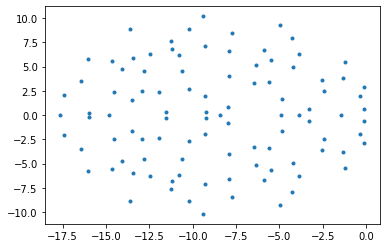

In [43]:
import matplotlib.pyplot as plt
poles = lti.poles()
_ = plt.plot(poles.real, poles.imag, '.')

### FOM Hankel Singular Values

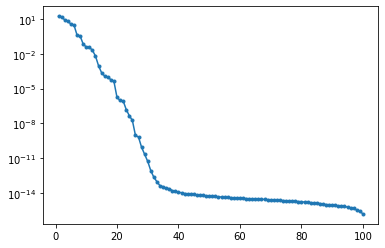

In [44]:
_ = plt.semilogy(range(1, n + 1), lti.hsv(), '.-')

### FOM Bode Plot

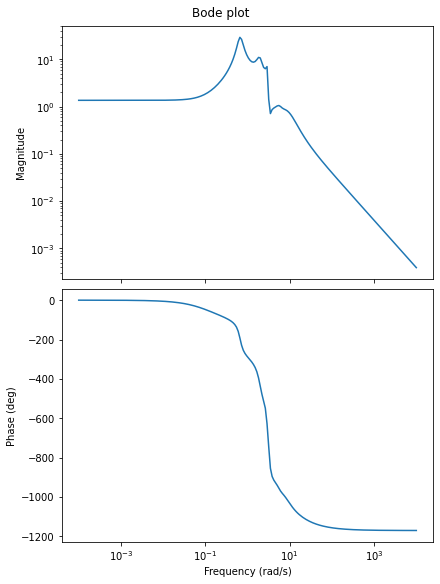

In [45]:
w = np.logspace(-4, 4, 200)
_ = lti.bode_plot(w)

### Balanced Truncation

In [46]:
bt = BTReductor(lti)

In [47]:
rom_bt = bt.reduce(10)

05:42 gram_schmidt: Orthonormalizing vector 1 again
05:42 gram_schmidt: Orthonormalizing vector 2 again
05:42 gram_schmidt: Orthonormalizing vector 4 again
05:42 gram_schmidt: Orthonormalizing vector 5 again
05:42 gram_schmidt: Orthonormalizing vector 6 again
05:42 gram_schmidt: Orthonormalizing vector 7 again
05:42 gram_schmidt: Orthonormalizing vector 8 again
05:42 gram_schmidt: Orthonormalizing vector 9 again
05:42 gram_schmidt: Orthonormalizing vector 4 again
05:42 gram_schmidt: Orthonormalizing vector 5 again
05:42 gram_schmidt: Orthonormalizing vector 6 again
05:42 gram_schmidt: Orthonormalizing vector 7 again
05:42 gram_schmidt: Orthonormalizing vector 8 again
05:42 gram_schmidt: Orthonormalizing vector 9 again
05:42 LTIPGReductor: Operator projection ...
05:42 LTIPGReductor: Building ROM ...


In [48]:
rom_bt

LTIModel(
    NumpyMatrixOperator(<10x10 dense>),
    NumpyMatrixOperator(<10x1 dense>),
    NumpyMatrixOperator(<1x10 dense>),
    D=ZeroOperator(NumpyVectorSpace(1), NumpyVectorSpace(1)),
    E=NumpyMatrixOperator(<10x10 dense>, name='IdentityOperator'),
    name='LTIModel_reduced')

In [49]:
print(rom_bt)

LTIModel_reduced
    class: LTIModel
    number of equations: 10
    number of inputs:    1
    number of outputs:   1
    continuous-time
    linear time-invariant
    solution_space:  NumpyVectorSpace(10)


In [50]:
rom_bt.to_matrices()

(array([[-2.51141998e-02, -2.92520928e-01,  2.03298434e-01,
          1.37992472e-01, -1.55758031e-01, -6.58654282e-02,
          2.72341481e-02,  1.03076219e-01,  2.43581026e-02,
         -4.30582541e-02],
        [ 1.96428170e-01,  1.52142428e-01,  1.32104182e-01,
          7.11478582e-03, -1.95102877e-01,  1.11429289e-01,
          1.27096436e-01,  2.07246988e-02, -3.93053640e-02,
          2.07307088e-02],
        [-4.28538121e-02,  3.28621701e-02, -1.25629817e-01,
         -7.56227707e-01, -6.21795605e-04, -5.37874886e-02,
         -7.62677120e-02,  1.69475150e-02, -5.00280965e-01,
         -2.44095921e-01],
        [ 3.82343722e-02,  7.98227882e-02,  7.05440984e-01,
         -4.81531385e-01,  5.95062449e-02,  5.08696689e-02,
         -3.48777434e-01, -4.11585109e-01, -5.10986904e-02,
         -3.55071006e-01],
        [ 5.85046125e-02,  1.33626727e-02, -2.58385386e-01,
         -4.54039349e-01, -4.65372135e-01, -1.63648518e+00,
         -1.80402071e-01,  4.65089093e-01, -1.927064

### ROM poles

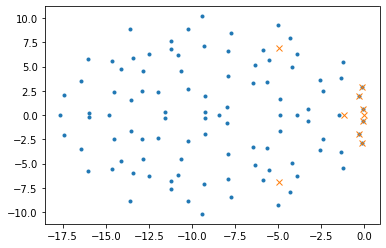

In [51]:
poles = lti.poles()
poles_rom = rom_bt.poles()
_ = plt.plot(poles.real, poles.imag, '.')
_ = plt.plot(poles_rom.real, poles_rom.imag, 'x')

### ROM Hankel Singular Values

In [ ]:
_ = plt.semilogy(range(1, n + 1), lti.hsv(), '.-')
_ = plt.semilogy(range(1, 11), rom_bt.hsv(), '.-')

### ROM Bode Plot

In [ ]:
fig, ax = plt.subplots(2, 1, squeeze=False, figsize=(6, 8), tight_layout=True)
_ = lti.bode_plot(w, ax=ax)
_ = rom_bt.bode_plot(w, ax=ax, linestyle='--')

### Error Magnitude Plot

In [ ]:
err_bt = lti - rom_bt
_ = err_bt.mag_plot(w)

### Relative Errors

In [ ]:
print(err_bt.hinf_norm() / lti.hinf_norm())
print(err_bt.h2_norm() / lti.h2_norm())